integrale calculer dans le processeure  0 égal -1.9902571753477738
Integrale = -1.9902571753477738
le temps de l'execution 0.004237344999999948


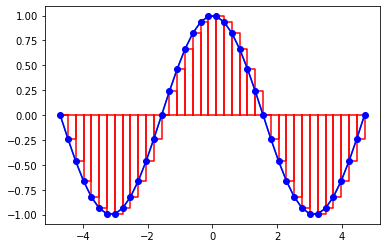

In [1]:

import numpy as np
import matplotlib.pyplot as plt
from mpi4py import MPI
import time

COMM= MPI.COMM_WORLD
Rank= COMM.Get_rank()
p= COMM.Get_size()
tag=99

def itegrale_rectangle(x, y, nbi):
    integrale =0.
    for i in range(nbi):
        integrale = integrale + y[i]*(x[i+1]-x[i])
        
    return integrale

def plot_integrale(x, y, nbi):
  
    for i in range(nbi):
          # dessin du rectangle
        x_rect = [x[i], x[i], x[i+1], x[i+1], x[i]] # abscisses des sommets
        y_rect = [0   , y[i], y[i]  , 0     , 0   ] # ordonnees des sommets
        plt.plot(x_rect, y_rect,"r")
        
startime = time.process_time()
Xmin = -3*np.pi/2
Xmax = 3*np.pi/2
nx = 40
dx = (Xmax-Xmin)/(nx-1)
nbi = int((nx-1)/p) 
if p==(Rank+1):   
    nbi=nbi+(nx-1)%p
    xmin = Xmin+(p-1)*nbi*dx
    xmax = 3*np.pi/2 
else:
    
    xmin =Xmin+Rank*nbi*dx
    xmax =Xmin+nbi*dx

x = np.linspace(xmin, xmax, nbi+1)
y = np.cos(x)
integrale = itegrale_rectangle(x, y, nbi)
if Rank==0:
    integrale_sum=integrale
    print("integrale calculer dans le processeure ",Rank,"égal",integrale)
    for i in range(1,p):
        pc=COMM.recv(source=i,tag=tag)
        print("processeur",Rank,"rcevoir un message de",i)
        integrale_sum+=integrale
    print("Integrale =", integrale_sum)
else:
    print("processeur",Rank,"envoiyer un message à","le processeur",0)
    print("integral calculer dans le processure ",Rank,"égal",integrale)
    COMM.send(integrale,dest=0,tag=tag)
endtime= time.process_time()
print("le temps de l'execution",endtime-startime)

plot_integrale(x, y, nbi)
plt.plot(x,y)
plt.plot(x,y,'bo-')   
plt.show()